In [1]:
import panda as pd

ModuleNotFoundError: No module named 'panda'

In [2]:
!pip install panda


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7295 sha256=89594f6e0dd312e9e1747bc9a391b90a16875260f33f4f9eb775211d90f0fe3d
  Stored in directory: c:\users\ali\appdata\local\pip\cache\wheels\98\41\5b\6ca54e0b6a35e1b7248c12f56fcb753dfb7717fefaa0fb45f5
Successfully built panda



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

In [5]:
data = {
    'Order_ID': [1011,1012,1013,1014,1015,1016,1017,1018,1019,1020],
    'Date': ['2025-03-02','2025-03-04','2025-03-06','2025-03-08','2025-03-11','2025-03-13','2025-03-15','2025-03-17','2025-03-20','2025-03-22'],
    'Customer_ID': ['C008','C009','C010','C008','C011','C012','C013','C009','C014','C010'],
    'Region': ['West','East','South','North','East','West','South','East','North','West'],
    'Product': ['Tablet','Laptop','Phone','Laptop','Tablet','Laptop','Phone','Tablet','Phone','Laptop'],
    'Quantity': [1,2,3,1,2,4,2,3,1,2],
    'Sales': [500,2000,1350,950,700,2600,1200,1050,600,1800],
    'Profit': [80,350,220,150,100,420,180,160,90,300],
    'Leads': [6,9,7,5,8,10,6,7,5,9]
}


In [6]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Order_ID,Date,Customer_ID,Region,Product,Quantity,Sales,Profit,Leads
0,1011,2025-03-02,C008,West,Tablet,1,500,80,6
1,1012,2025-03-04,C009,East,Laptop,2,2000,350,9
2,1013,2025-03-06,C010,South,Phone,3,1350,220,7
3,1014,2025-03-08,C008,North,Laptop,1,950,150,5
4,1015,2025-03-11,C011,East,Tablet,2,700,100,8


In [7]:
# 1. Total Sales
total_sales = df['Sales'].sum()

# 2. Total Orders
total_orders = df['Order_ID'].nunique()

# 3. Average Order Value (AOV)
aov = df['Sales'].mean()

# 4. Number of Customers
unique_customers = df['Customer_ID'].nunique()

# 5. Repeat Purchase Rate
repeat_customers = df['Customer_ID'].value_counts().loc[lambda x: x > 1].count()
repeat_purchase_rate = (repeat_customers / unique_customers) * 100

# 6. Monthly Sales Growth
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
sales_growth = ((monthly_sales.iloc[-1] - monthly_sales.iloc[0]) / monthly_sales.iloc[0]) * 100

# 7. Conversion Rate
conversion_rate = (len(df) / df['Leads'].sum()) * 100

# 8. Top Product
top_product = df.groupby('Product')['Sales'].sum().idxmax()

# 9. Region-wise Sales
region_sales = df.groupby('Region')['Sales'].sum()

# 10. Profit Margin
profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100

In [8]:
print("====== SALES KPI DASHBOARD ======")
print(f"Total Sales: ${total_sales}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value (AOV): ${aov:.2f}")
print(f"Number of Customers: {unique_customers}")
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")
print(f"Sales Growth: {sales_growth:.2f}%")
print(f"Conversion Rate: {conversion_rate:.2f}%")
print(f"Top Product: {top_product}")
print(f"Profit Margin: {profit_margin:.2f}%")
print("\nRegion-wise Sales:")
print(region_sales)


====== SALES KPI DASHBOARD ======
Total Sales: $12750
Total Orders: 10
Average Order Value (AOV): $1275.00
Number of Customers: 7
Repeat Purchase Rate: 42.86%
Sales Growth: 0.00%
Conversion Rate: 13.89%
Top Product: Laptop
Profit Margin: 16.08%

Region-wise Sales:
Region
East     3750
North    1550
South    2550
West     4900
Name: Sales, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

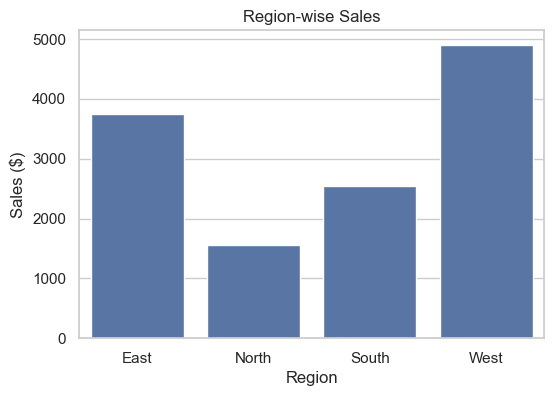

In [10]:
# Style
sns.set(style="whitegrid")

# 1. Region-wise Sales
plt.figure(figsize=(6,4))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Region-wise Sales")
plt.ylabel("Sales ($)")
plt.show()

C:\Users\Ali\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


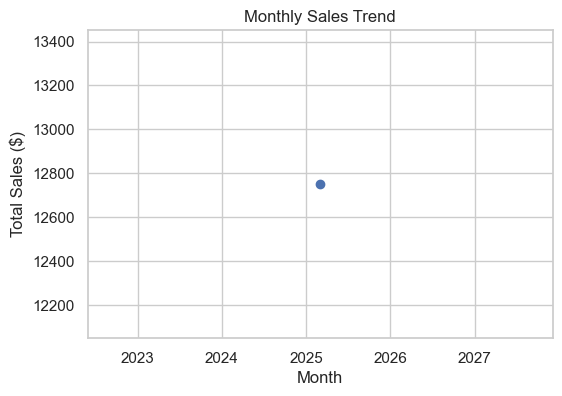

In [11]:
plt.figure(figsize=(6,4))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales ($)")
plt.show()

C:\Users\Ali\AppData\Local\Temp\ipykernel_44488\208289319.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Product'], y=df['Sales'], estimator=sum, ci=None)


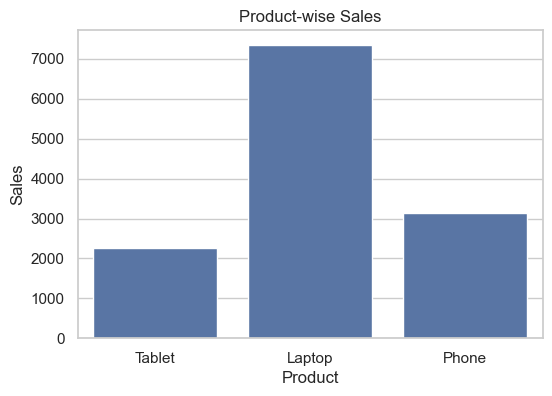

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Product'], y=df['Sales'], estimator=sum, ci=None)
plt.title("Product-wise Sales")
plt.show()

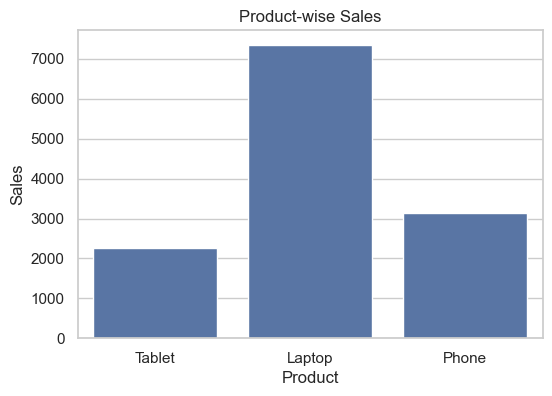

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Product'], y=df['Sales'], estimator=sum, errorbar=None)
plt.title("Product-wise Sales")
plt.show()